In [1]:
from matplotlib import pyplot as plt

In [2]:
import pandas as pd
import numpy as np

In [ ]:
# expense categories with proportions
categories = {
    "Housing": 0.30,  
    "Groceries & Essentials": 0.15,  
    "Transportation": 0.10, 
    "Utilities": 0.05, 
    "Dining Out & Entertainment": 0.10, 
    "Healthcare & Insurance": 0.10,  
    "Education & Self-Development": 0.10,  
    "Other": 0.10 
}
# Set total budget and number of transactions
total_budget = 75000
num_transactions = 120  

# Allocate budget proportionally
category_budgets = {cat: total_budget * prop for cat, prop in categories.items()}


np.random.seed(42)
dates = pd.date_range(start="2025-03-01", periods=30)

data = []
for category, budget in category_budgets.items():
    num_entries = int(num_transactions * categories[category])  # Allocate transactions per category

    for _ in range(num_entries):
        amount = np.random.randint(int(budget * 0.02), int(budget * 0.08))  # Keep transactions sensible
        data.append({"Date": np.random.choice(dates), "Category": category, "Amount": amount})

# Create DataFrame
df = pd.DataFrame(data)

# Normalize expenses to fit within budget
scaling_factor = total_budget / df["Amount"].sum()
df["Amount"] = (df["Amount"] * scaling_factor).astype(int)  # Adjust and convert to integers

# Shuffle dataset for randomness
df = df.sample(frac=1).reset_index(drop=True)

# Display 
print(df.head())


        Date                Category  Amount
0 2025-03-07                 Housing    1338
1 2025-03-10          Transportation     425
2 2025-03-15                   Other     312
3 2025-03-24  Groceries & Essentials     287
4 2025-03-02                 Housing    1849


In [4]:
# Check total expenses (should be close to ₹75,000)
total_expense = df["Amount"].sum()
print(f"Total Monthly Expenses: ₹{total_expense}")


Total Monthly Expenses: ₹74941


In [5]:
# Group by Category and sum the Amounts
monthly_expenses = df.groupby("Category")["Amount"].sum()
monthly_expenses

Category
Dining Out & Entertainment       4471
Education & Self-Development     4503
Groceries & Essentials           9990
Healthcare & Insurance           3993
Housing                         41625
Other                            5174
Transportation                   4096
Utilities                        1089
Name: Amount, dtype: int64

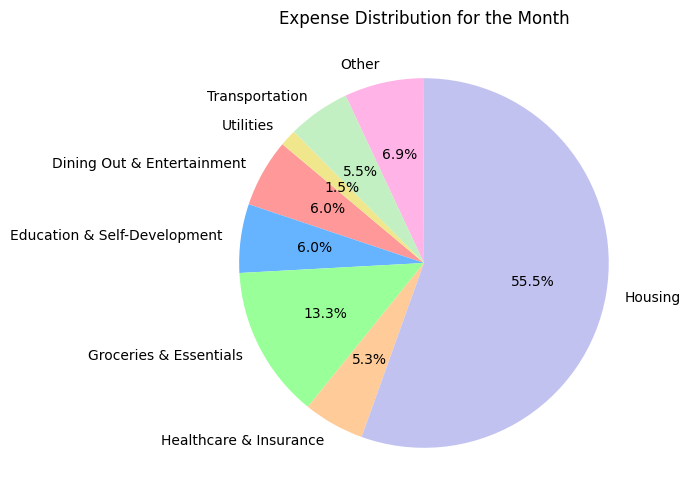

In [6]:
# Plot Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(
    monthly_expenses, labels=monthly_expenses.index, autopct='%1.1f%%',
    colors=["#ff9999", "#66b3ff", "#99ff99", "#ffcc99", "#c2c2f0", "#ffb3e6", "#c2f0c2", "#f0e68c"],
    startangle=140
)
plt.title("Expense Distribution for the Month")
plt.show()
